In [3]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 3]

# Exercise 1 {-}

In exercise 1 the 'diatoms' dataset will be plotted. First a single cell  - the first cell of the dataset - is plotted and then all of the cells in the dataset are plotted on top of eachother.  

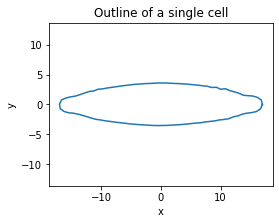

In [4]:
#import diatoms dataset
diatoms = np.loadtxt('diatoms.txt')

#plot a single cell
cellx = diatoms[0][::2]
celly = diatoms[0][1::2]

#close the plot by adding the first point at the end
cellx = np.append(cellx, cellx[0])
celly = np.append(celly,celly[0])

plt.plot(cellx,celly)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Outline of a single cell')
plt.show()



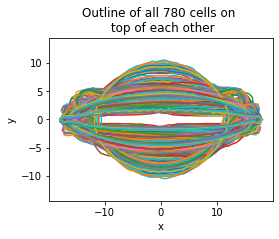

In [5]:
#plot all cells on top of each other
plt.figure()
for i in range(len(diatoms)):
    cellx = diatoms[i][::2]
    celly = diatoms[i][1::2]
    
    #close the plots by adding the first point at the end
    cellx = np.append(cellx, cellx[0])
    celly = np.append(celly,celly[0])
    
    plt.plot(cellx,celly)    
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Outline of all 780 cells on \n top of each other')
plt.show()

From plotting both a single cell and all the cells on top of eachother I see a tendency towards the cells having an oval/ elliptical shape. 

# Exercise 2 {-}

In exercise 2 PCA will be performed on the 'diatoms' dataset to compute the first three principal components (PCs). The spatial variance of the cells will then be visualized by plotting five different instances for each of the first three PCs. In the plots below, $e_1$, $e_2$ and $e_3$ are the first three PCs, $m$ is the mean cell and $\sigma_1$,$\sigma_2$ and $\sigma_3$ denote the standard deviation of the data projected onto the first three PCs. 

First the PCA function is defined. 

In [6]:
#define PCA function
def pca(A):
    #compute covariance matrix
    Sigma = np.cov(A.T)
    #compute eigenvalues and eigenvectors for covariance matrix
    evals, evecs = np.linalg.eigh(Sigma)
    # switch eigenvalue (and corresponding eigenvector) ordering
    evals = evals[::-1]
    evecs = evecs[:,::-1]
    
    return evals, evecs   


Next, PCA is performed on the diatoms dataset and the elements for the instances mentioned above are defined (PCs, projections, standard deviations and mean).  

In [7]:
#center diatoms dataset
for i in range(len(diatoms)):
    diatoms[i][::2] -= np.mean(diatoms[i][::2])
    diatoms[i][1::2] -= np.mean(diatoms[i][1::2])

#perform PCA on diatoms dataset
evals, evecs = pca(diatoms)

#define first 3 PCs
pc1 = evecs[:,0]
pc2 = evecs[:,1]
pc3 = evecs[:,2]

#project data on to first 3 PCs
proj1 = diatoms@pc1
proj2 = diatoms@pc2
proj3 = diatoms@pc3

#compute the corresponding standard deviations
s1 = np.std(proj1) 
s2 = np.std(proj2)
s3 = np.std(proj3)

#define the mean cell
mean = [np.mean(diatoms[:,i]) for i in range(len(diatoms[0]))]

Next, the five instances for PC1 are plotted. 

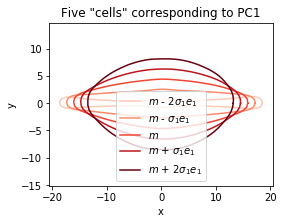

In [8]:
#plot the "cells" corresponding to PC1
multiples = [-2,-1,0,1,2]

reds = plt.get_cmap('Reds')
legends = [r'$m$'+' - 2'+r'$\sigma_1$'+r'$e_1$',r'$m$'+' - '+r'$\sigma_1$'+r'$e_1$',r'$m$', r'$m$'+' + '+r'$\sigma_1$'+r'$e_1$', r'$m$'+' + 2'+r'$\sigma_1$'+r'$e_1$']

plt.figure()
for i in range(5):
    cell = mean+multiples[i]*s1*pc1
    cellx = cell[::2]
    celly = cell[1::2]
    
    #close the plots by adding the first point at the end
    cellx = np.append(cellx, cellx[0])
    celly = np.append(celly,celly[0])
    
    plt.plot(cellx,celly, color=reds(np.linspace(0.2,1,5)[i]),label=legends[i])
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Five "cells" corresponding to PC1')
plt.show()

Next, the five instances for PC2 are plotted. 

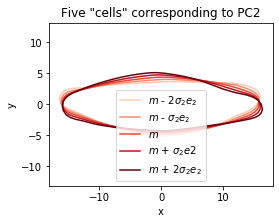

In [9]:
#plot the "cells" corresponding to PC2
multiples = [-2,-1,0,1,2]

reds = plt.get_cmap('Reds')
legends = [r'$m$'+' - 2'+r'$\sigma_2$'+r'$e_2$',r'$m$'+' - '+r'$\sigma_2$'+r'$e_2$',r'$m$', r'$m$'+' + '+r'$\sigma_2$'+r'$e2$', r'$m$'+' + 2'+r'$\sigma_2$'+r'$e_2$']

plt.figure()
for i in range(5):
    cell = mean+multiples[i]*s2*pc2
    cellx = cell[::2]
    celly = cell[1::2]
    
    #close the plots by adding the first point at the end
    cellx = np.append(cellx, cellx[0])
    celly = np.append(celly,celly[0])
    
    plt.plot(cellx,celly, color=reds(np.linspace(0.2,1,5)[i]),label=legends[i])
plt.legend()
plt.title('Five "cells" corresponding to PC2')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Lastly, the five instances for PC3 are plotted. 

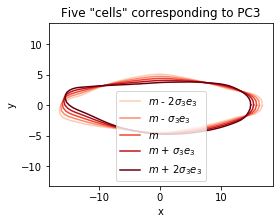

In [10]:
#plot the "cells" corresponding to PC3
multiples = [-2,-1,0,1,2]

reds = plt.get_cmap('Reds')
legends = [r'$m$'+' - 2'+r'$\sigma_3$'+r'$e_3$',r'$m$'+' - '+r'$\sigma_3$'+r'$e_3$',r'$m$', r'$m$'+' + '+r'$\sigma_3$'+r'$e_3$', r'$m$'+' + 2'+r'$\sigma_3$'+r'$e_3$']

plt.figure()
for i in range(5):
    cell = mean+multiples[i]*s3*pc3
    cellx = cell[::2]
    celly = cell[1::2]
    
    #close the plots by adding the first point at the end
    cellx = np.append(cellx, cellx[0])
    celly = np.append(celly,celly[0])
    
    plt.plot(cellx,celly, color=reds(np.linspace(0.2,1,5)[i]),label=legends[i])
plt.axis('equal')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Five "cells" corresponding to PC3')
plt.show()

On the three plots corresponding to the first three PCs, we see how the mean cell is the same in all three plots, as would be expected. On the plot corresponding to PC1 the four instances with the the standard deviation invovled deviate more from the mean than the corresponding instances on the two plots corresponding to PC2 and PC3. This shows how PC1 captures more of the variance in the diatoms dataset than both PC2 and PC3. It also shows how PC1 contributes significantly more to determining the shape of the cell than both PC2 and PC3 do. 

# Exercise 3a {-}

In exercise 3a, three preprocessing steps are assumed to be performed prior to performing PCA. The effects of these three preprocessing steps are discussed and it is concluded whether or not performing the preprocessing step is a good idea. 

i) If by PCA we mean the process of computing the covariance matrix from the data and then performing eigendecomposition of the covariance matrix, then centering makes no difference for the result of PCA. By definition, variance is the average squared deviation from the mean so computing the covariance matrix implicitly performs centering. In conclusion, centered and non-centered data will have the same covariance matrix. 

ii) Standardizing data before performing PCA is important. By doing PCA you project your data onto the axes of highest variance. Without standardizing the data before doing PCA an axis might seem to have a higher variance relative to other axes than it actually does. By standardizing the data first you make sure the axes have the proper relative variance and you get a much more precise PCA result. In conclusion, standardizing the data before PCA is a good idea. 

iii) Whitening is the process of transforming a dataset with a known covariance matrix into a dataset whose covariance matrix is the identity matrix. Since any non-zero vector is an eigenvector of the identity matrix, performing PCA on a dataset after performing whitening on it will do nothing and just return the same dataset that was returned after whitening. In conclusion, performing whitening before PCA is a bad idea.  

# Exercise 3b {-}

In exercise 3b PCA is performed on the toy dataset to visualize it in 2D. 

First the toy data is imported and PCA is performed on it to compute the two first PCs. The projection of the toy data on its first two PCS is then plotted.  

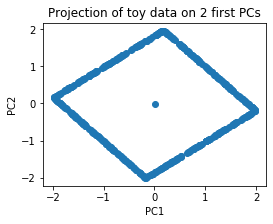

In [11]:
#import toy data
toy = np.loadtxt('pca_toy_data.txt')

#center toy data
for i in range(np.shape(toy)[1]):
    toy[:,i] -= np.mean(toy[:,i])
        
#perform PCA on toy data
evals, evecs = pca(toy)

#project toy data onto the first 2 PCs
pc1 = evecs[:,0]
pc2 = evecs[:,1]
proj1 = toy@pc1
proj2 = toy@pc2

#plot the projection of the toy data
plt.scatter(proj1,proj2)
plt.title('Projection of toy data on 2 first PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Next the last two datapoints of the projection of the data are left out and the projection is plotted again. 

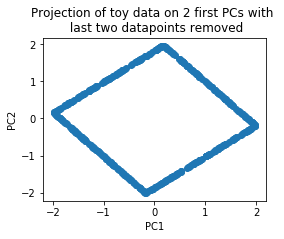

In [12]:
#remove last two data points from projection and plot again
plt.scatter(proj1[:-2],proj2[:-2])
plt.title('Projection of toy data on 2 first PCs with \n last two datapoints removed')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In both plots a rhombus shape is seen. After removing the last two datapoints in the second plot, the dot in the middle of the rhombus has disappeared. 

# Exercise 4 {-}

In exercise 4 both 2-means clustering and PCA are performed on the pesticide dataset. 

First 2-means clustering is performed on the pesticide data to compute two cluster centers just as done in exercise 3 of Assignment 3. For initial cluster centers the first two data points in the pesticide dataset are used.

In [13]:
#load and center the pesticide training data
pest = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
XPest = pest[:,:-1]
XPest -= [np.mean(XPest[:,i]) for i in range(np.shape(XPest)[1])]

#define initial cluster centers
cen1 = XPest[0]
cen2 = XPest[1]

#repeat the 2-means clustering until cluster centers are unchanged
for n in range(50):
    clust1 = []
    clust2 = []
    oldcen1 = cen1
    oldcen2 = cen2
    #assign each data point to a cluster
    for i in range(len(XPest)):
        #distance between data point and cluster center 1
        dist1 = np.sqrt(sum((XPest[i][m]-cen1[m])**2 for m in range(len(XPest[0]))))
        #distance between data point and cluster center 2
        dist2 = np.sqrt(sum((XPest[i][m]-cen2[m])**2 for m in range(len(XPest[0]))))
        if dist1 < dist2:
            clust1.append(XPest[i])
        else:
            clust2.append(XPest[i])

    cen1 = np.array([np.mean(np.array(clust1)[:,i]) for i in range(len(clust1[0]))])
    cen2 = np.array([np.mean(np.array(clust2)[:,i]) for i in range(len(clust1[0]))])
    
    if np.array_equal([cen1,cen2], [oldcen1,oldcen2]) == True:
        break

Next PCA is performed on the pesticide data to compute the two first PCs. Both the 2-means clusters and cluster centers found in 2-means clustering are then projected onto the first two PCs. Lastly the projection of the dataset colored according to the 2-means classification is plotted along with the projection of the two cluster centers. 

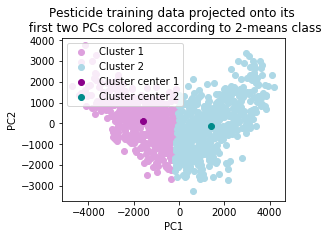

The projection of the first cluster center is at [-1596.8017643567614, 123.75257989152334]
The projection of the second cluster center is at [1404.7053115018123, -108.86505148352025]


In [14]:
#perform PCA on pesticide training data
evals, evecs = pca(XPest)
pc1 = evecs[:,0]
pc2 = evecs[:,1]

#project the clusters of pesticide data onto the first two PCs
proj1 = clust1@pc1
proj2 = clust1@pc2
proj3 = clust2@pc1
proj4 = clust2@pc2

#project the found cluster centers onto the first two PCs
clust_proj1 = [cen1@pc1, cen1@pc2]
clust_proj2 = [cen2@pc1, cen2@pc2]

#plot both the Occupancy and the cluster centers projected onto the first two PCs
plt.figure()
plt.scatter(proj1,proj2, color='plum', label='Cluster 1')
plt.scatter(proj3,proj4, color='lightblue', label='Cluster 2')
plt.scatter(clust_proj1[0], clust_proj1[1], color='darkmagenta', label='Cluster center 1')
plt.scatter(clust_proj2[0], clust_proj2[1], color='darkcyan', label='Cluster center 2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Pesticide training data projected onto its \n first two PCs colored according to 2-means class')
plt.show()

print('The projection of the first cluster center is at ' + str(clust_proj1))
print('The projection of the second cluster center is at ' + str(clust_proj2))


As seen on the plot the two projected cluster centers seem to visually lie in the middle of each cluster as would be expected. 

# Exercise 5 {-}

In exercise 5 both 2-means clustering and PCA are performed on the occupancy dataset just as in exercise 4.  

First 2-means clustering is performed on the occupancy data to compute two cluster centers. For initial cluster centers the first two data points in the occupancy dataset are used. 

In [15]:
#load and center the occupancy data
occupancy = np.loadtxt('occupancy_data.csv', delimiter=',')
XOccupancy = occupancy[:,:-1]
XOccupancy -= [np.mean(XOccupancy[:,i]) for i in range(np.shape(XOccupancy)[1])]

#define initial cluster centers
cen1 = XOccupancy[0]
cen2 = XOccupancy[1]

#repeat the 2-means clustering until cluster centers are unchanged
for n in range(50):
    clust1 = []
    clust2 = []
    oldcen1 = cen1
    oldcen2 = cen2
    #assign each data point to a cluster
    for i in range(len(XOccupancy)):
        #distance between data point and cluster center 1
        dist1 = np.sqrt(sum((XOccupancy[i][m]-cen1[m])**2 for m in range(len(XOccupancy[0]))))
        #distance between data point and cluster center 2
        dist2 = np.sqrt(sum((XOccupancy[i][m]-cen2[m])**2 for m in range(len(XOccupancy[0]))))
        if dist1 < dist2:
            clust1.append(XOccupancy[i])
        else:
            clust2.append(XOccupancy[i])

    cen1 = np.array([np.mean(np.array(clust1)[:,i]) for i in range(len(clust1[0]))])
    cen2 = np.array([np.mean(np.array(clust2)[:,i]) for i in range(len(clust1[0]))])
    
    if np.array_equal([cen1,cen2], [oldcen1,oldcen2]) == True:
        break

print('The first cluster center is at ' + str(cen1))
print('The second cluster center is at ' + str(cen2))

The first cluster center is at [-1.79088083e+04 -4.00023380e-01 -4.41974740e-01 -2.46334882e+01
 -1.09409183e+02 -1.74785423e-04]
The second cluster center is at [1.79793848e+04 4.01599826e-01 4.43716513e-01 2.47305660e+01
 1.09840352e+02 1.75474233e-04]


Next PCA is performed on the occupancy data to compute the two first PCs. Both the clusters and cluster centers found in 2-means clustering are then projected onto the first two PCs. Lastly the projection of the dataset colored according to the 2-means classification is plotted along with the projection of the two cluster centers. 

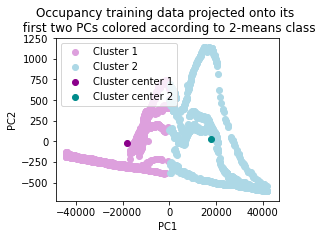

The projection of the first cluster center is at [-17909.142522414284, -22.55325431885311]
The projection of the second cluster center is at [17979.720423980452, 22.642134138828947]


In [16]:
#perform PCA on the Occupancy data
evals, evecs = pca(XOccupancy)
pc1 = evecs[:,0]
pc2 = evecs[:,1]

#project the clusters of Occupancy data onto the first two PCs
proj1 = clust1@pc1
proj2 = clust1@pc2
proj3 = clust2@pc1
proj4 = clust2@pc2

#project the found cluster centers onto the first two PCs
clust_proj1 = [cen1@pc1, cen1@pc2]
clust_proj2 = [cen2@pc1, cen2@pc2]

#plot both the Occupancy and the cluster centers projected onto the first two PCs
plt.figure()
plt.scatter(proj1,proj2, color='plum', label='Cluster 1')
plt.scatter(proj3,proj4, color='lightblue', label='Cluster 2')
plt.scatter(clust_proj1[0], clust_proj1[1], color='darkmagenta', label='Cluster center 1')
plt.scatter(clust_proj2[0], clust_proj2[1], color='darkcyan', label='Cluster center 2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Occupancy training data projected onto its \n first two PCs colored according to 2-means class')
plt.legend()
plt.show()

print('The projection of the first cluster center is at ' + str(clust_proj1))
print('The projection of the second cluster center is at ' + str(clust_proj2))

As seen on the plot the two projected cluster centers seem to visually lie in the middle of each cluster as would be expected. 